## Main Goal
Clustering credit cards based on their buying habits, credit limits, and many other financial factors!  
**Credit Cards Clustering** or **Credit Cards Segmentation**

### Data Understanding
The Sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.  
The dataset has the following features:  
1. **CUST_ID**: Identification of Credit Card holder (Categorical)
2. **BALANCE**: Balance amount left in their account to make purchases 
3. **BALANCE_FREQUENCY**: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. **PURCHASES**: Amount of purchases made from account
5. **ONEOFF_PURCHASES**: Maximum purchase amount done in one-go
6. **INSTALLMENTS_PURCHASES**: Amount of purchase done in installment
7. **CASH_ADVANCE**: Cash in advance given by the user
8. **PURCHASES_FREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. **ONEOFFPURCHASESFREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. **PURCHASESINSTALLMENTSFREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. **CASHADVANCEFREQUENCY**: How frequently the cash in advance being paid
12. **CASHADVANCETRX**: Number of Transactions made with "Cash in Advanced"
13. **PURCHASES_TRX**: Numbe of purchase transactions made
14. **CREDIT_LIMIT**: Limit of Credit Card for user
15. **PAYMENTS**: Amount of Payment done by user
16. **MINIMUM_PAYMENTS**: Minimum amount of payments made by user
17. **PRCFULLPAYMENT**: Percent of full payment paid by user
18. **TENURE**: Tenure of credit card service for user

The dataset has the 8950 observations & 18 features!  
The dataset can be accessed on: [https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data]

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("datasets/CCards.csv")

In [3]:
dataset.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
dataset.shape

(8950, 18)

In [6]:
dataset.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Exploratory Data Analysis
#### Are customers with missing minimum payments showing a PRC_FULL_PAYMENT of 1?

In [7]:
missing_min_payments = dataset[dataset['MINIMUM_PAYMENTS'].isna()]

In [8]:
full_payment_count = missing_min_payments[missing_min_payments['PRC_FULL_PAYMENT'] == 1].shape[0]
total_missing_min_payments = missing_min_payments.shape[0]
percentage_full_payment = (full_payment_count / total_missing_min_payments) * 100

In [9]:
print(f"Number of customers with missing minimum payments: {total_missing_min_payments}")
print(f"Number of these customers with PRC_FULL_PAYMENT = 1: {full_payment_count}")
print(f"Percentage of these customers with PRC_FULL_PAYMENT = 1: {percentage_full_payment:.2f}%")

Number of customers with missing minimum payments: 313
Number of these customers with PRC_FULL_PAYMENT = 1: 0
Percentage of these customers with PRC_FULL_PAYMENT = 1: 0.00%


#### Do customers with missing minimum payments have zero balances or zero purchases?

In [13]:
# Check if these customers have zero balances
zero_balances = missing_min_payments[missing_min_payments['BALANCE'] == 0].shape[0]
total_customers_with_missing_min_payment = missing_min_payments.shape[0]

print(f"Number of customers with missing minimum payments and zero balance: {zero_balances}")
print(f"Percentage of these customers with zero balance: {(zero_balances / total_customers_with_missing_min_payment) * 100:.2f}%")

Number of customers with missing minimum payments and zero balance: 74
Percentage of these customers with zero balance: 23.64%


In [14]:
# Check if these customers have zero purchases
zero_purchases = missing_min_payments[missing_min_payments['PURCHASES'] == 0].shape[0]

print(f"Number of customers with missing minimum payments and zero purchases: {zero_purchases}")
print(f"Percentage of these customers with zero purchases: {(zero_purchases / total_customers_with_missing_min_payment) * 100:.2f}%")

Number of customers with missing minimum payments and zero purchases: 76
Percentage of these customers with zero purchases: 24.28%


#### Is there a pattern between the missing values and TENURE or CREDIT_LIMIT?

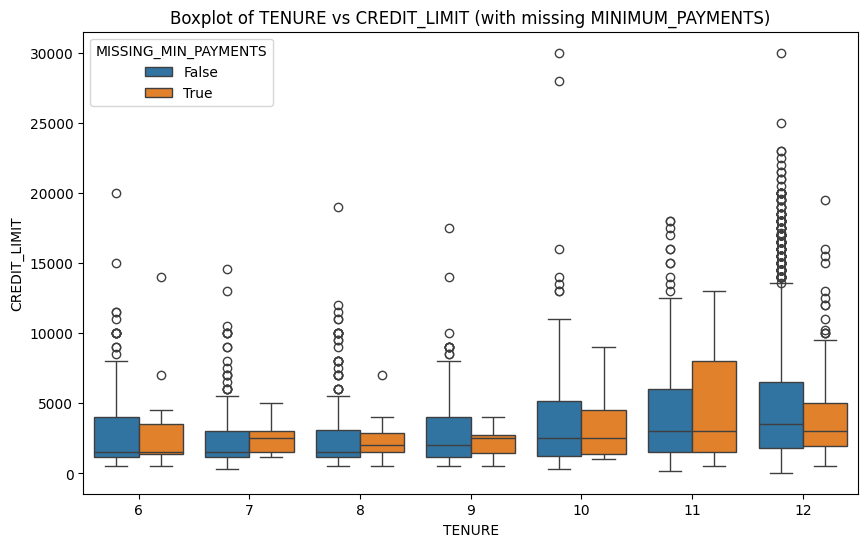

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TENURE', y='CREDIT_LIMIT', hue=dataset['MINIMUM_PAYMENTS'].isnull(), data=dataset)
plt.title('Boxplot of TENURE vs CREDIT_LIMIT (with missing MINIMUM_PAYMENTS)')
plt.legend(title='MISSING_MIN_PAYMENTS')
plt.show()

> Tenure <= 10:The similarity in the box ranges (IQRs) suggests that there is no significant difference in the distribution of TENURE between customers with missing minimum payments and those without. It implies that having missing minimum payments does not affect the tenure length for these customers.  
> Tenure 11: The slightly larger box for customers with missing minimum payments indicates more variability in tenure among these customers compared to those without missing payments. However, since the mean is the same, it suggests that the central tendency (average tenure) is unaffected.  
> Tenure 12: The slightly larger box for customers without missing minimum payments indicates more variability in tenure for these customers. The similar mean suggests that, again, the average tenure is not impacted by whether the minimum payment is missing or not.  
> Outliers: The presence of more outliers in the boxes of customers without missing minimum payments indicates that there are more extreme values in tenure among these customers. It could imply that customers who do not have missing minimum payments may have more diverse experiences with the credit card service duration.

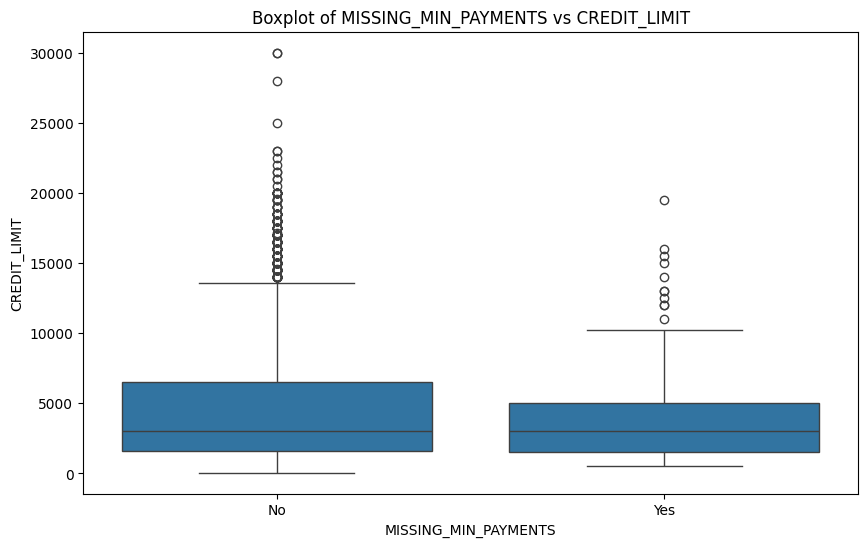

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['MINIMUM_PAYMENTS'].isnull(), y='CREDIT_LIMIT', data=dataset)
plt.title('Boxplot of MISSING_MIN_PAYMENTS vs CREDIT_LIMIT')
plt.xlabel('MISSING_MIN_PAYMENTS')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

> Box size and mean: The larger box for customers without missing minimum payments suggests greater variability in credit limits among these customers. Since both boxes have almost the same mean value, it indicates that the average credit limit is similar for both groups. However, the spread of values (variability) is greater for customers without missing minimum payments.

> Tenure and Credit Limit: Both analyses suggest that the presence of missing minimum payments does not significantly impact the central tendencies (mean) of TENURE and CREDIT_LIMIT. However, the variability (spread of data) seems to be greater among customers without missing minimum payments.

#### Are the missing entries associated with high CASH_ADVANCE amounts?

0       12
1       12
2       12
3       12
4       12
        ..
8945     6
8946     6
8947     6
8948     6
8949     6
Name: TENURE, Length: 8950, dtype: int64